In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Set the backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Switch backend for plt if necessary

%matplotlib inline  

import seaborn as sns
sns.set(style='whitegrid', context='notebook')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Print a statement to ensure the cell is run
print('Libraries imported and configured.')

Libraries imported and configured.


In [5]:
file_path = '/kaggle/input/ai-powered-resume-screening-dataset-2025/AI_Resume_Screening.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='ascii')

# Quick peek at the dataset structure
print('Dataset loaded. DataFrame shape:', df.shape)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/ai-powered-resume-screening-dataset-2025/AI_Resume_Screening.csv'

In [7]:
import pandas as pd
import zipfile
import os

# Path to the ZIP file
zip_path = r"C:\Users\hp pc\Downloads\archive.zip"

# Extract files from the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(r"C:\Users\hp pc\Downloads\archive_extracted")

# Path to the CSV inside the extracted folder
csv_file = r"C:\Users\hp pc\Downloads\archive_extracted\AI_Resume_Screening.csv"

# Load CSV into DataFrame
df = pd.read_csv(csv_file, encoding='utf-8')  # utf-8 is safer than ascii

# Quick peek at the dataset
print('Dataset loaded. DataFrame shape:', df.shape)
df.head()


Dataset loaded. DataFrame shape: (1000, 11)


,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100


In [9]:
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print('Missing values per column:')
print(missing_values)

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

# Trim whitespace in string columns which can be a common source of errors
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

# For this dataset, there's no explicit date column. If there were dates, we might use pd.to_datetime() to convert them.

print('Data cleaning completed. Frame shape:', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_ID               1000 non-null   int64 
 1   Name                    1000 non-null   object
 2   Skills                  1000 non-null   object
 3   Experience (Years)      1000 non-null   int64 
 4   Education               1000 non-null   object
 5   Certifications          726 non-null    object
 6   Job Role                1000 non-null   object
 7   Recruiter Decision      1000 non-null   object
 8   Salary Expectation ($)  1000 non-null   int64 
 9   Projects Count          1000 non-null   int64 
 10  AI Score (0-100)        1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
Missing values per column:
Resume_ID                   0
Name                        0
Skills                      0
Experience (Years)          0
Education           

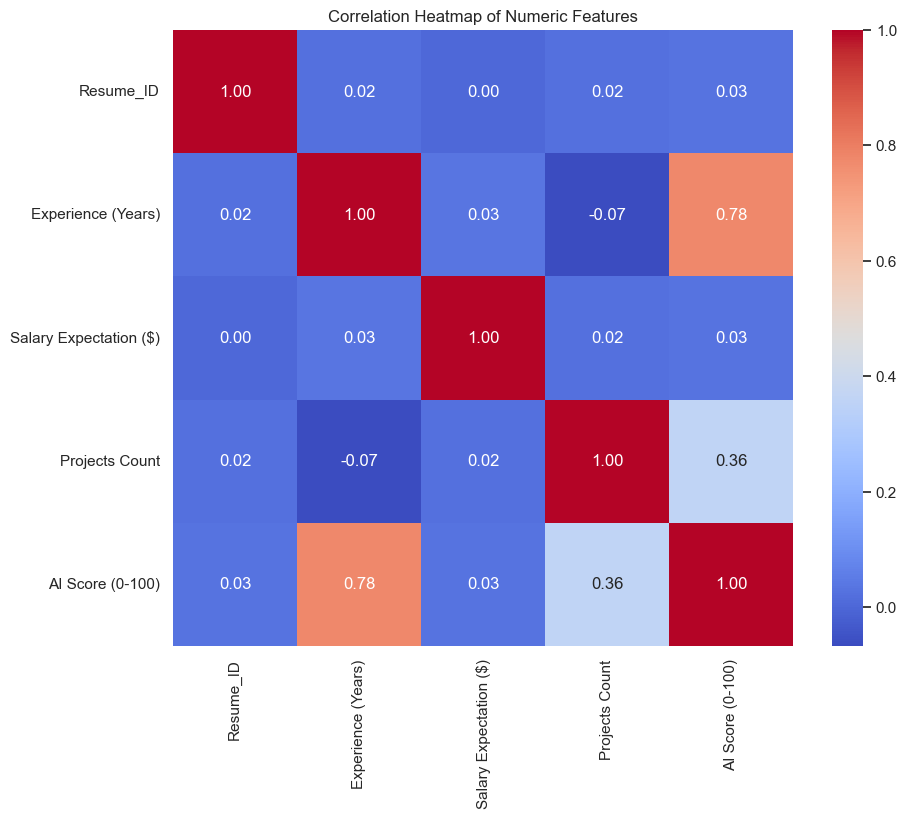

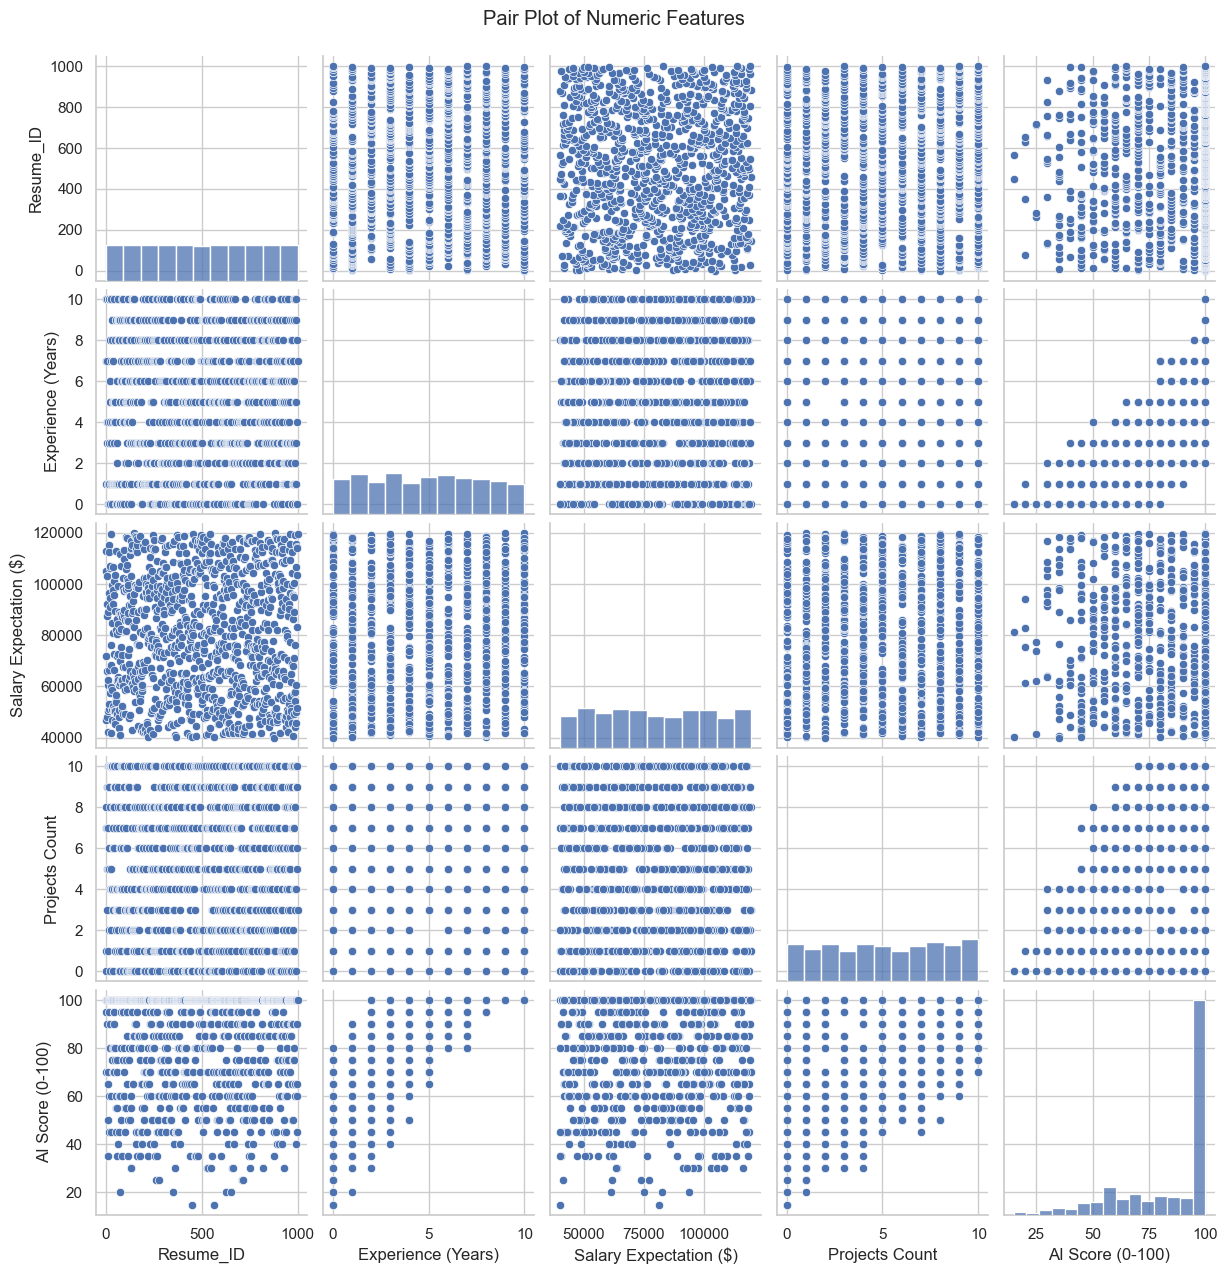

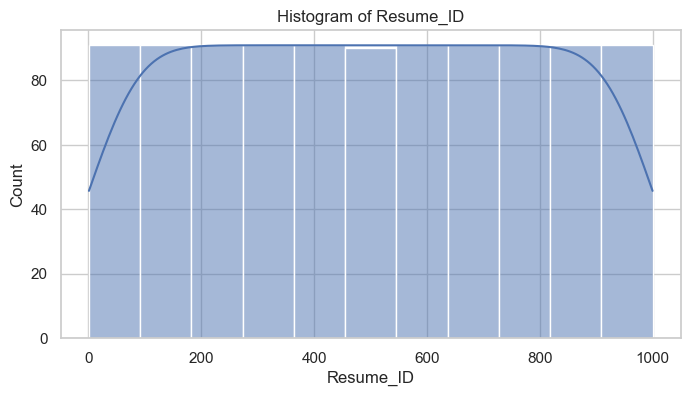

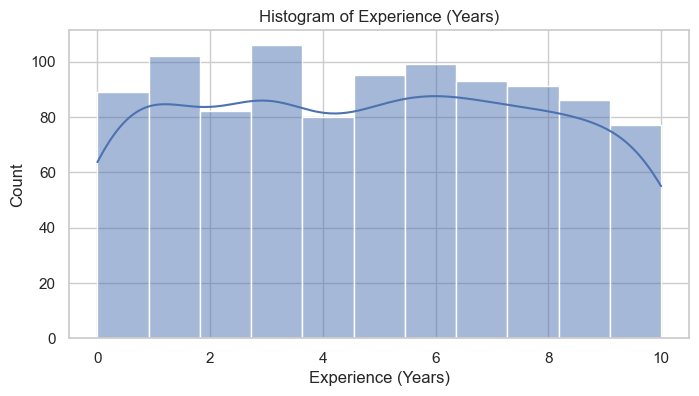

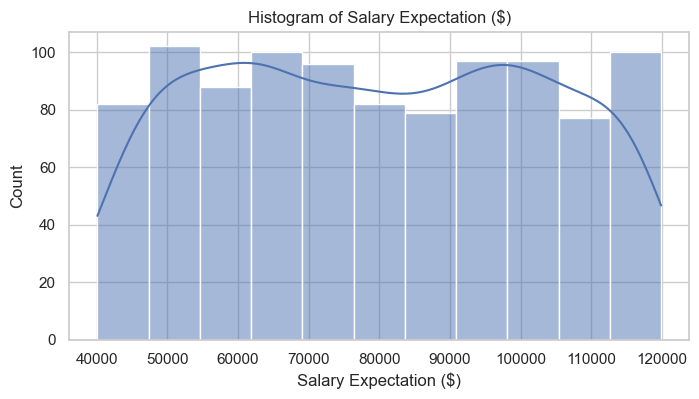

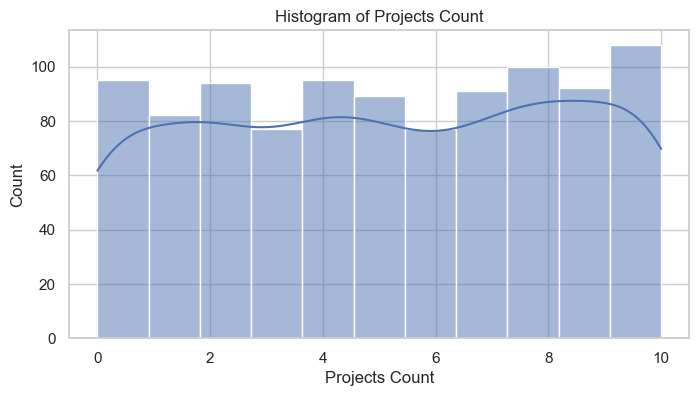

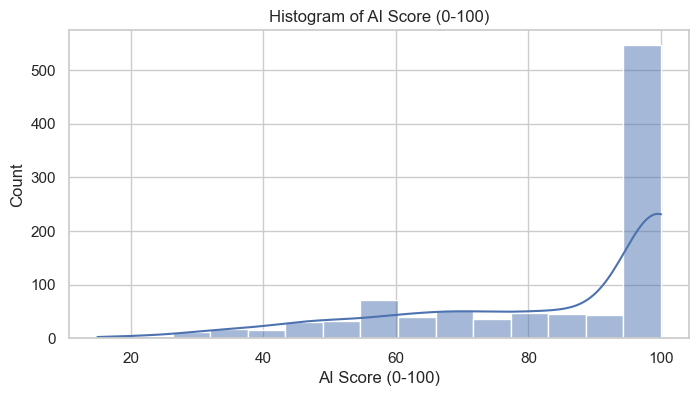

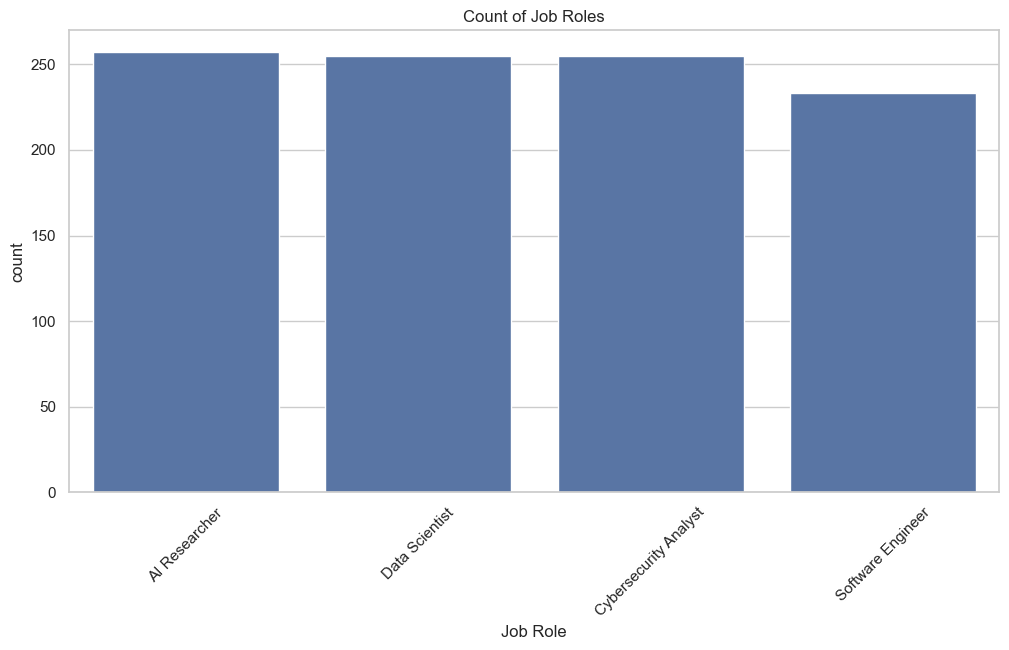

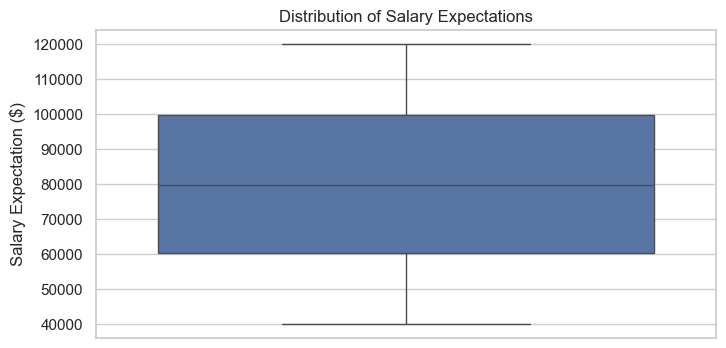

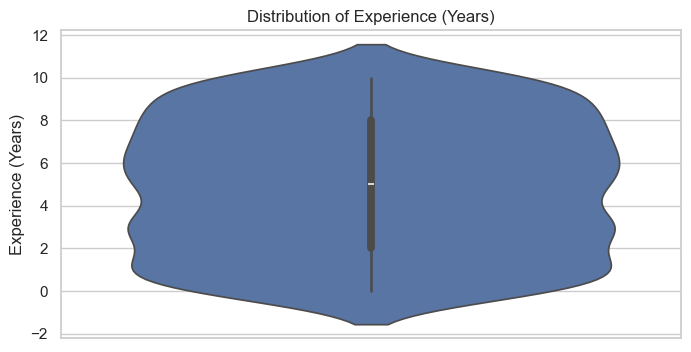

In [11]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

# Pair Plot to visualize relationships between numeric features
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

# Histograms for numeric data distributions
numeric_columns = numeric_df.columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# Countplot for a categorical variable such as 'Job Role'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Job Role', order=df['Job Role'].value_counts().index)
plt.title('Count of Job Roles')
plt.xticks(rotation=45)
plt.show()

# Box Plot for Salary Expectation
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, y='Salary Expectation ($)')
plt.title('Distribution of Salary Expectations')
plt.show()
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, y='Experience (Years)')
plt.title('Distribution of Experience (Years)')
plt.show()